In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [84]:
titanic = pd.read_csv("C:\\Users\\hp\\Downloads\\archive\\train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Exploration

In [85]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [86]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [87]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [88]:
titanic.value_counts('Sex', normalize=True)

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

In [89]:
titanic.value_counts('Survived')

Survived
0    549
1    342
Name: count, dtype: int64

In [90]:
titanic[titanic.Sex == 'male'].value_counts('Survived')

Survived
0    468
1    109
Name: count, dtype: int64

Sex
male      577
female    314
Name: count, dtype: int64


Text(0.5, 1.0, 'Number of Male and Female in Titanic Boat')

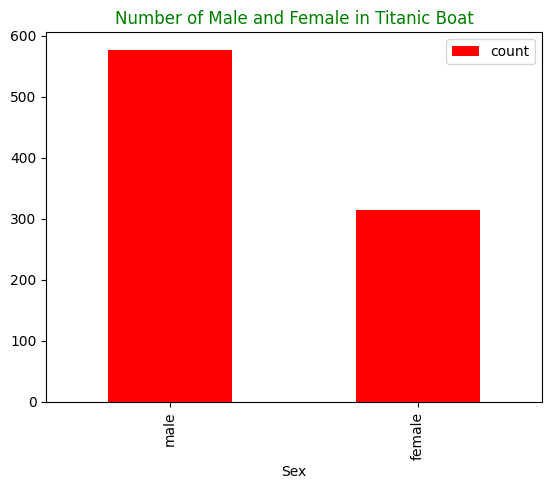

In [91]:
print(titanic['Sex'].value_counts())
titanic['Sex'].value_counts().plot(kind='bar', color='red', legend=True )
plt.title('Number of Male and Female in Titanic Boat', color='green')

In [92]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [93]:
group_by_sex = titanic[['Fare', 'Sex']].groupby(by='Sex')
group_by_sex.sum()

,Fare
Sex,
female,13966.6628
male,14727.2865


In [94]:
group_by_embarked = titanic[['Fare', 'Embarked']].groupby(by='Embarked')
group_by_embarked.sum()

,Fare
Embarked,
C,10072.2962
Q,1022.2543
S,17439.3988


<Axes: title={'center': 'Port from where people sit'}, ylabel='count'>

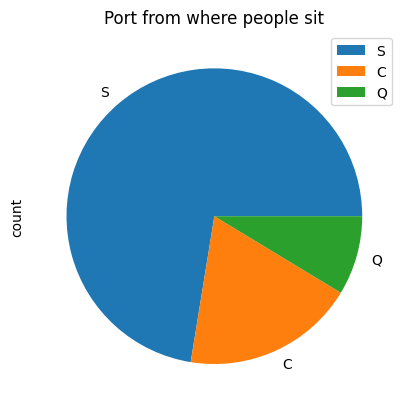

In [95]:
titanic['Embarked'].value_counts().plot(kind='pie', title='Port from where people sit', legend=True, grid=True)

In [96]:
corr = titanic[['Age', 'Fare', 'Survived', 'Pclass']].corr()

<Axes: >

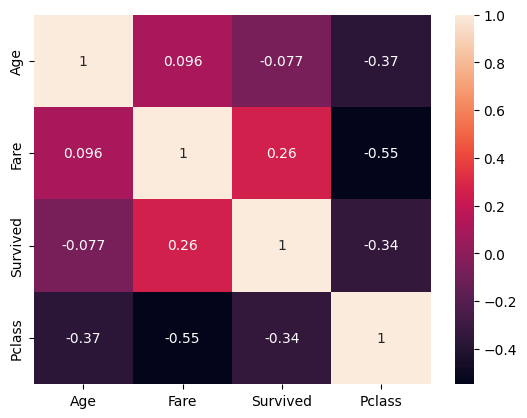

In [97]:
sns.heatmap(data=corr, annot=True)

In [98]:
titanic.loc[0:10, ["Age", "Fare"]]

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
5,NaN,8.4583
6,54.0,51.8625
7,2.0,21.0750
8,27.0,11.1333
9,14.0,30.0708


In [99]:
titanic.loc[122, 'Name']

'Nasser, Mr. Nicholas'

In [100]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<br>

### Data Manipulation

In [101]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
titanic.drop('PassengerId', axis=1, inplace=True)

In [103]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
mode_embarked=titanic['Embarked'].mode()
mode_embarked

0    S
Name: Embarked, dtype: object

In [105]:
titanic['Embarked'].fillna(value=mode_embarked[0], inplace=True)
titanic.Embarked.isna().sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_2916\2835549541.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(value=mode_embarked[0], inplace=True)


0

In [106]:
titanic.Cabin.isna().sum()

687

In [133]:
titanic['Cabin'] = titanic['Cabin'].fillna(0).map(lambda x: 1 if x != 0 else 0)

Those who sat in the cabin are represented by 1 and those who did not are represented by 0

In [135]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,Mr


In [136]:
titanic.duplicated().sum()

0

In [137]:
incorrect_age = titanic[(titanic['Age'] <=0) | (titanic['Age'] > 100)]
incorrect_age.value_counts().sum()

0

In [138]:
incorrect_gender = titanic[~titanic['Sex'].isin(['male', 'female'])]
incorrect_gender.value_counts().sum()

0

<Axes: >

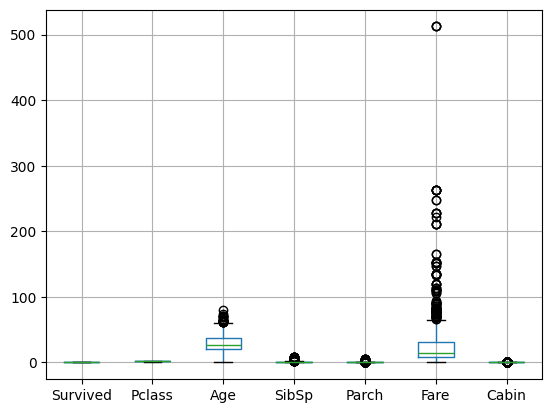

In [139]:
titanic.boxplot()

### Handling missing age values

In [140]:
titanic.at[796, "Name"] = 'Leader, dr. Alice (Farnham)' # Dealing with 'gender' of Doctors.

In [141]:
def get_initials(value):
    name = value.split(',')[1]
    initials = name.split('.')[0]
    return initials.strip()

In [142]:
titanic['Initials'] = titanic['Name'].apply(get_initials)

In [143]:
titanic.Initials.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'dr', 'Jonkheer'], dtype=object)

<Axes: xlabel='Initials'>

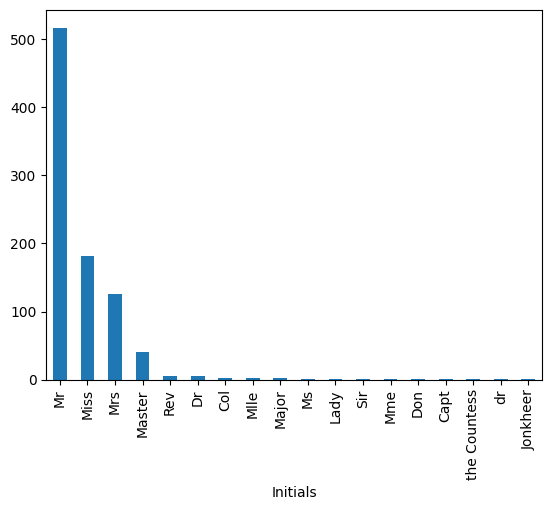

In [144]:
titanic.Initials.value_counts().plot(kind='bar')

In [145]:
titanic['Initials'].value_counts()

Initials
Mr              517
Miss            182
Mrs             125
Master           40
Rev               6
Dr                6
Col               2
Mlle              2
Major             2
Ms                1
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
dr                1
Jonkheer          1
Name: count, dtype: int64

In [146]:
titanic[titanic.Initials=="Dr"]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials
245,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.00,1,Q,Dr
317,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.00,0,S,Dr
398,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.50,0,S,Dr
632,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.50,1,C,Dr
660,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.65,0,S,Dr
766,0,1,"Brewe, Dr. Arthur Jackson",male,42.0,0,0,112379,39.60,0,C,Dr


In [147]:
titanic['Initials'].replace(to_replace={'Lady':'Miss', 'Sir':'Mr','Ms':'Miss', 'Capt':'Mr', 'Dr':'Mr', 'Col':'Mr', 'Mme':'Mrs', 
               'Don':'Mr', 'Rev':'Mr', 'Major':'Mr', 'Mlle':'Miss', 'the Countess':'Mrs', 
               'Jonkheer':'Master', 'dr':'Mrs'}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_2916\2670531194.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Initials'].replace(to_replace={'Lady':'Miss', 'Sir':'Mr','Ms':'Miss', 'Capt':'Mr', 'Dr':'Mr', 'Col':'Mr', 'Mme':'Mrs',


In [148]:
titanic.Initials.unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [149]:
titanic.Initials.value_counts()

Initials
Mr        536
Miss      186
Mrs       128
Master     41
Name: count, dtype: int64

<Axes: xlabel='Initials'>

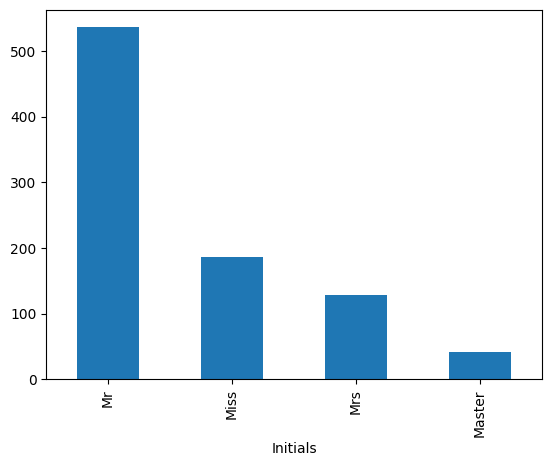

In [150]:
titanic.Initials.value_counts().plot(kind='bar')

In [151]:
grouped = titanic.groupby(by='Initials')
grouped['Age'].agg(Nan=lambda x: x.isna().sum(), NoNaN=lambda x: x.notna().sum())

,Nan,NoNaN
Initials,,
Master,0,41
Miss,0,186
Mr,0,536
Mrs,0,128


In [152]:
grouped['Age'].agg(['mean','median'])

,mean,median
Initials,,
Master,5.333415,4.0
Miss,21.370968,18.0
Mr,32.122201,28.0
Mrs,35.796875,35.0


In [153]:
## Filling null Age.

titanic.loc[titanic.Age.isna(), 'Age'] = titanic.groupby(
    ['Sex', 'Pclass', 'Initials'])['Age'].transform('median')

In [154]:
titanic.Age.isna().sum()

0

In [157]:
titanic.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
Initials    0
dtype: int64

In [158]:
titanic.to_csv(
    "clean_data.csv",
    index=False
)